ARJUN KC(8773456)

**Assignment 1**
**CSCN8000 Artificial Intelligence Algorithms and Mathematics**

1.	Given the symptoms exhibited in a patient and a database of anonymized patient records, predict whether the patient is likely to have an illness (Parkinson’s disease).
    A model of this decision problem could be used by a program to provide decision support to medical professionals.
  	
   You can follow the following steps :
  	
   •	Data Analysis
  	
   •	Data Preprocessing
  	
   •	Data Standardization
  	
   •	Model Training
  	
   •	Measure your model’s accuracy.
  	
      a.	Use 80% of samples as training data size.

   •	Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.
  	
You can download the Dataset from: https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification  
Notes:
This lab should be submitted as a notebook and an HTML. Follow https://docs.github.com/en/pages/quickstart. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
sns.set_style("whitegrid")

### Loading Dataset and Doing EDA

In [49]:
df_arj = pd.read_csv("pd_speech_features.csv")

In [50]:
df_arj.head() #read the first 5 line of dataset

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


In [51]:
df_arj.shape  #defines the shape of given dataset as row and columns

(757, 755)

In [52]:
df_arj.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Baseline Features', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9',
       ...
       'Unnamed: 745', 'Unnamed: 746', 'Unnamed: 747', 'Unnamed: 748',
       'Unnamed: 749', 'Unnamed: 750', 'Unnamed: 751', 'Unnamed: 752',
       'Unnamed: 753', 'Unnamed: 754'],
      dtype='object', length=755)

#### Data Analysis

From dataset we can see that, our dataset has unwanted columns name like Unnamed:0,Unnamed:1 so lets make the dataset clear, clean and move for the further data analysis process

Lets keep the first row ie index[0] as our column name because it has labeled columns name and makes easy for doing data anaylsis

In [53]:
df_arj.columns = df_arj.iloc[0]  # using index based selection to select the first row of dataset

In [54]:
df_arj  #we can see our column name has been changed and is similar to row first index

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,250,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
753,250,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
754,251,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
755,251,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [55]:
df_arj.drop(index=0,inplace=True)  # now we drop the first row of index and our data has now labeled columns which is easy for data processing

In [56]:
df_arj.drop(columns="id",inplace=True)

In [57]:
df_arj.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,1.61E-05,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,1.47E-05,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,4.55E-05,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,4.37E-05,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [58]:
df_arj.describe() #gives the descriptive analysis of the dataset

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756,756,756,756,756,756,756,756,756,756,...,756,756,756,756,756,756,756,756,756,756
unique,2,740,745,748,315,319,755,646,358,543,...,749,755,752,753,749,752,753,753,754,2
top,1,0.82273,0.72248,0.62128,237,236,0.006004477,7.17E-05,0.00076,1.39E-05,...,1.7726,4.0251,2.8454,4.2105,2.6829,3.1144,12.595,4.2391,3.2941,1
freq,390,3,2,2,9,8,2,3,9,10,...,2,2,2,2,2,2,2,2,2,564


In [59]:
df_arj.columns  #now our columns name has been changed 

Index(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       'locAbsJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', name=0, length=754)

Since there are 755 columns in the dataset and we might not need all columns for analysis so we can drop the unncessary columns, do some data manipulation using pandas

In [60]:
nw_columns = df_arj.columns[:6]  # I found these columns as important as compared to other so going to keep this data for new dataframe
nw_columns           # later it can be used as independent variable

Index(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses'], dtype='object', name=0)

In [61]:
nw_columns1 = df_arj["class"]  #adding these too in new dataframe and used as dependednt variable 
nw_columns1

1      1
2      1
3      1
4      1
5      1
      ..
752    0
753    0
754    0
755    0
756    0
Name: class, Length: 756, dtype: object

Making new dataframe by concatenating new selected columns

In [62]:
arj_new_df = pd.concat([df_arj[nw_columns],nw_columns1],axis=1)
arj_new_df   #we can see our new dataframe has been created

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,class
1,1,0.85247,0.71826,0.57227,240,239,1
2,1,0.76686,0.69481,0.53966,234,233,1
3,1,0.85083,0.67604,0.58982,232,231,1
4,0,0.41121,0.79672,0.59257,178,177,1
5,0,0.3279,0.79782,0.53028,236,235,1
...,...,...,...,...,...,...,...
752,0,0.80903,0.56355,0.28385,417,416,0
753,0,0.16084,0.56499,0.59194,415,413,0
754,0,0.88389,0.72335,0.46815,381,380,0
755,0,0.83782,0.7489,0.49823,340,339,0


In [63]:
arj_new_df.shape  #gives the total shape of the dataset as a row and columns after man

(756, 7)

In [64]:
arj_new_df.isnull().sum()  #we can see there is no missing value

gender              0
PPE                 0
DFA                 0
RPDE                0
numPulses           0
numPeriodsPulses    0
class               0
dtype: int64

In [65]:
arj_new_df.info()  #we can see there is no missing value as row and column has the same shape(756,755)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 756
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            756 non-null    object
 1   PPE               756 non-null    object
 2   DFA               756 non-null    object
 3   RPDE              756 non-null    object
 4   numPulses         756 non-null    object
 5   numPeriodsPulses  756 non-null    object
 6   class             756 non-null    object
dtypes: object(7)
memory usage: 47.2+ KB


In [66]:
arj_new_df=arj_new_df.apply(pd.to_numeric,errors="coerce") #converting all our data to inter and float as data was in object as string
arj_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 756
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            756 non-null    int64  
 1   PPE               756 non-null    float64
 2   DFA               756 non-null    float64
 3   RPDE              756 non-null    float64
 4   numPulses         756 non-null    int64  
 5   numPeriodsPulses  756 non-null    int64  
 6   class             756 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 47.2 KB


From dataset, we got the information that feautre "class" has two element which is 0 and 1 where 0 is considered as no Parkinson disease , on the other hand 1 is considered as Parkinson disease 

In [67]:
len(arj_new_df["class"]) #total class instances are 756

756

In [68]:
arj_new_df["class"].unique() #we can see there are two unique element of array ie 0 and 1

array([1, 0], dtype=int64)

In [69]:
arj_new_df["class"].nunique()  #there are total 2 unique array element

2

From the class columns, lets see how many of them has no Parkinson disease and has Parkinson disease

In [70]:
arj_new_df["class"].value_counts() #we can see that 284315 are normal transaction where as 492 are fraudulet transaction

1    564
0    192
Name: class, dtype: int64

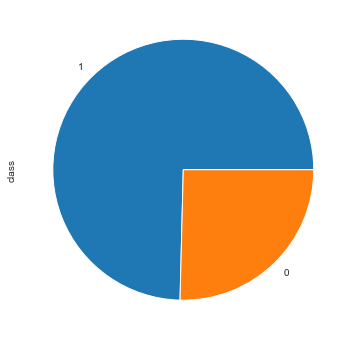

People with no_Parkinson_disease: 192
People with Parkinson_disease: 564
Portion of the Parkinson_disease is: 293.75


In [71]:
plt.figure(figsize=(8,6))
arj_new_df["class"].value_counts().plot(kind = "pie")
plt.show()
no_Parkinson_disease = 192
Parkinson_disease = 564
print("People with no_Parkinson_disease:",no_Parkinson_disease)
print("People with Parkinson_disease:",Parkinson_disease)
print("Portion of the Parkinson_disease is:", round(Parkinson_disease/no_Parkinson_disease *100,3))

Lets see the count plot of Target variable ie class which has no_Parkinson_disease and Parkinson_disease

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


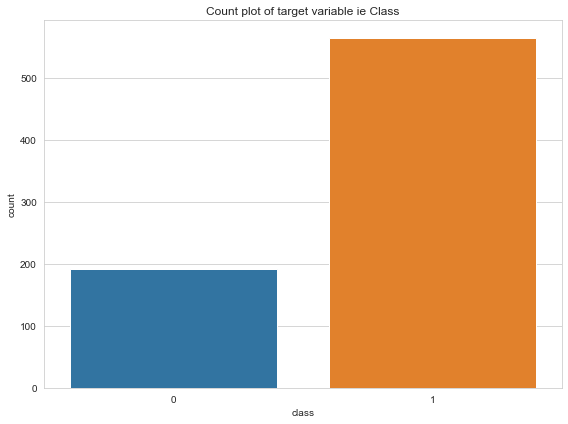

From this count plot we can see that more people have Parkinson disease


In [72]:
plt.figure(figsize=(8,6))
sns.countplot(arj_new_df["class"])
plt.title("Count plot of target variable ie Class")
plt.tight_layout()
plt.show()
print("From this count plot we can see that more people have Parkinson disease")

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


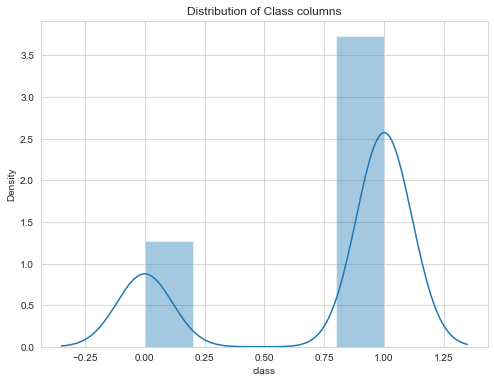

We can see that the distribution is Bimodal for class columns as it has two peak with two values 


In [73]:
plt.figure(figsize=(8,6))
sns.distplot(arj_new_df["class"])
plt.title("Distribution of Class columns")
plt.show()
print("We can see that the distribution is Bimodal for class columns as it has two peak with two values ")


Lets see the correlation of features using Heatmap

In [74]:
#arj_col =['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses','class']
#arj_new_df[arjun_to]=arj_new_df[arjun_to].apply(pd.to_numeric)


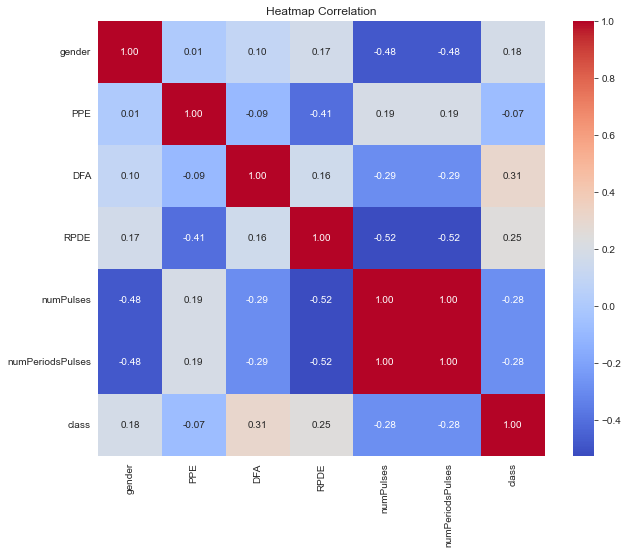

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(arj_new_df.corr(),cmap="coolwarm",annot=True,fmt=".2f")
plt.title("Heatmap Correlation")
plt.show()

#### Data Preprocessing

In [76]:
X= arj_new_df.drop(columns=["class"])  #defining the features or independent variable


In [77]:
y =arj_new_df["class"]  #defining the target variable or dependent variable

#### Data Standardization

In [78]:
scal = StandardScaler()
X_scal = scal.fit_transform(X)

#### Spliting the data for Train and Test 

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Building the model

Thus we are doing prediction wheather the patient has no Parkinson disease or Parkinson disease so i perfer to use logistice regression.

In [80]:
log = LogisticRegression(max_iter=1000)

In [81]:
log =log.fit(X_train,y_train)

#### Finally Evaluating the model performance

In [82]:
y_pred_test = log.predict(X_test)  #prediction on test data

In [83]:
y_pred_train = log.predict(X_train)  #prediction on train data

#### Finding the accuracy

Finding the accuracy on Test data

In [84]:
accu = accuracy_score(y_test,y_pred_test)
print(f'The accuracy of this test data  for Parkinson Prediction is {round(accu *100,3)}')

The accuracy of this test data  for Parkinson Prediction is 76.316


Finding the accuracy on Train data

In [85]:
accu = accuracy_score(y_train,y_pred_train)
print(f'The accuracy of this train model for Parkinson Prediction is {round(accu *100,3)}')

The accuracy of this train model for Parkinson Prediction is 77.483


Calculating Confusion Matrix for both train and test data

Confusion matrix on Train data

In [86]:
conf_mat_tran = confusion_matrix(y_train,y_pred_train)
conf_mat_tran

array([[ 29, 125],
       [ 11, 439]], dtype=int64)

Confusion matrix on test data

In [87]:
conf_mat_test = confusion_matrix(y_test,y_pred_test)
conf_mat_test

array([[ 10,  28],
       [  8, 106]], dtype=int64)

Ploting the confusion matrix for train data

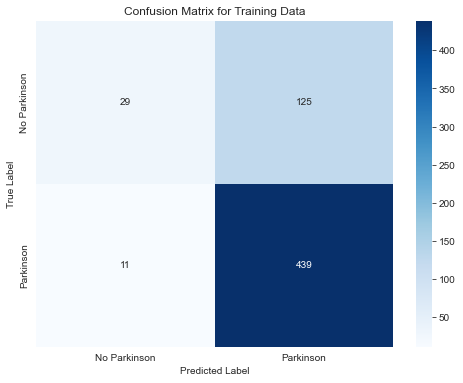

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat_tran,annot=True,fmt ="d",cmap ="Blues",xticklabels=["No Parkinson","Parkinson"],yticklabels=["No Parkinson","Parkinson"])
plt.title("Confusion Matrix for Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

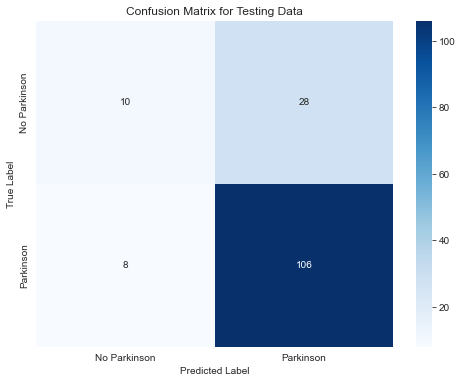

In [89]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat_test,annot=True,fmt ="d",cmap ="Blues",xticklabels=["No Parkinson","Parkinson"],yticklabels=["No Parkinson","Parkinson"])
plt.title("Confusion Matrix for Testing Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.

In [90]:
arj_new_df

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,class
1,1,0.85247,0.71826,0.57227,240,239,1
2,1,0.76686,0.69481,0.53966,234,233,1
3,1,0.85083,0.67604,0.58982,232,231,1
4,0,0.41121,0.79672,0.59257,178,177,1
5,0,0.32790,0.79782,0.53028,236,235,1
...,...,...,...,...,...,...,...
752,0,0.80903,0.56355,0.28385,417,416,0
753,0,0.16084,0.56499,0.59194,415,413,0
754,0,0.88389,0.72335,0.46815,381,380,0
755,0,0.83782,0.74890,0.49823,340,339,0


In [91]:
log.predict([[1,0.85247,0.71826,0.57227,240,239]])  #instance from 1st index

array([1], dtype=int64)

In [92]:
log.predict([[0,0.80903,0.56355,0.28385,417,416]])  #instance from 752 index

array([0], dtype=int64)

In [93]:
log.predict([[0,0.41121,0.79672,0.59257,178,177]])  #instance from 4index

array([1], dtype=int64)

After building model,we can see that model has predicted correctly for all instances where predicted output 1 is person with parkinson where as 0 is person without parkinson